In [34]:
#Importing Necessary Libraries for Implementing Part 1
import math
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from numpy import where
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.read_csv('Clean Data_2.csv')
df1 = pd.DataFrame(df)

samples,attributes = df1.shape
print('\nNo of Samples: {0} and No of Features: {1}'.format(samples,attributes))


No of Samples: 856 and No of Features: 26


In [3]:
df1.head(10)

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.0,15.0,1.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,1,15,1.0,14.0,1.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,2,34,1.0,17.0,1.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,3,52,5.0,16.0,4.0,1.0,37.00,37.0,1.0,3.0,...,0.0,0,1,0,1,0,0,0,0,0
4,4,46,3.0,21.0,4.0,0.0,0.00,0.0,1.0,15.0,...,0.0,0,0,0,0,0,0,0,0,0
5,5,42,3.0,23.0,2.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,6,51,3.0,17.0,6.0,1.0,34.00,3.4,0.0,0.0,...,0.0,0,0,0,0,0,1,1,0,1
7,7,26,1.0,26.0,3.0,0.0,0.00,0.0,1.0,2.0,...,0.0,0,0,0,0,0,0,0,0,0
8,8,45,1.0,20.0,5.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,9,44,3.0,15.0,2.0,1.0,1.27,2.8,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [4]:
df1.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
attributeList = df1.columns

print('\nColumns in Dataframe and their Imported Data Type:\n')
for i in range(len(attributeList.values)):
    print('Column {0} is \'{1}\' and of data type: {2}'.format(i+1,attributeList.values[i],df1[attributeList.values[i]].dtype))


Columns in Dataframe and their Imported Data Type:

Column 1 is 'Age' and of data type: int64
Column 2 is 'Number of sexual partners' and of data type: float64
Column 3 is 'First sexual intercourse' and of data type: float64
Column 4 is 'Num of pregnancies' and of data type: float64
Column 5 is 'Smokes' and of data type: float64
Column 6 is 'Smokes (years)' and of data type: float64
Column 7 is 'Smokes (packs/year)' and of data type: float64
Column 8 is 'Hormonal Contraceptives' and of data type: float64
Column 9 is 'Hormonal Contraceptives (years)' and of data type: float64
Column 10 is 'IUD' and of data type: float64
Column 11 is 'IUD (years)' and of data type: float64
Column 12 is 'STDs' and of data type: float64
Column 13 is 'STDs (number)' and of data type: int64
Column 14 is 'STDs:condylomatosis' and of data type: float64
Column 15 is 'STDs:syphilis' and of data type: float64
Column 16 is 'STDs:HIV' and of data type: float64
Column 17 is 'STDs: Number of diagnosis' and of data t

In [6]:
print(f"\nThe mean of the dataframe is:\n\n {df1.mean()}")
print(f"\nThe median of the dataframe is:\n\n {df1.median()}")
print(f"\nThe mode of the dataframe is:\n\n {df1.mode()}")


The mean of the dataframe is:

 Age                                26.835280
Number of sexual partners           2.467290
First sexual intercourse           17.004673
Num of pregnancies                  2.259346
Smokes                              0.142523
Smokes (years)                      1.198259
Smokes (packs/year)                 0.441402
Hormonal Contraceptives             0.657710
Hormonal Contraceptives (years)     2.300911
IUD                                 0.108645
IUD (years)                         0.499381
STDs                                0.091121
STDs (number)                       0.153037
STDs:condylomatosis                 0.050234
STDs:syphilis                       0.021028
STDs:HIV                            0.021028
STDs: Number of diagnosis           0.086449
Dx:Cancer                           0.021028
Dx:CIN                              0.010514
Dx:HPV                              0.021028
Dx                                  0.028037
Hinselmann            

In [7]:
#Check How many attributes are missing information

print('\n~~Checking for Samples with Missing Data~~\n')
print('Total Number of Samples is:',samples,'\n')
attributesWithMissingValues=0
# incomeDataFrame=incomeDataFrame.replace('?',pd.NA)

for i in range(len(attributeList)):
    dataCount = df1[attributeList[i]].count()
    if samples-dataCount>0:
        print("No of Samples in data set with missing attribute '{0}' are: {1}".format(attributeList[i],samples-dataCount))
        attributesWithMissingValues+=1

print("\nNo of Columns that have missing values:",attributesWithMissingValues)


~~Checking for Samples with Missing Data~~

Total Number of Samples is: 856 


No of Columns that have missing values: 0


In [8]:
df1.dtypes

Age                                  int64
Number of sexual partners          float64
First sexual intercourse           float64
Num of pregnancies                 float64
Smokes                             float64
Smokes (years)                     float64
Smokes (packs/year)                float64
Hormonal Contraceptives            float64
Hormonal Contraceptives (years)    float64
IUD                                float64
IUD (years)                        float64
STDs                               float64
STDs (number)                        int64
STDs:condylomatosis                float64
STDs:syphilis                      float64
STDs:HIV                           float64
STDs: Number of diagnosis            int64
Dx:Cancer                            int64
Dx:CIN                               int64
Dx:HPV                               int64
Dx                                   int64
Hinselmann                           int64
Schiller                             int64
Citology   

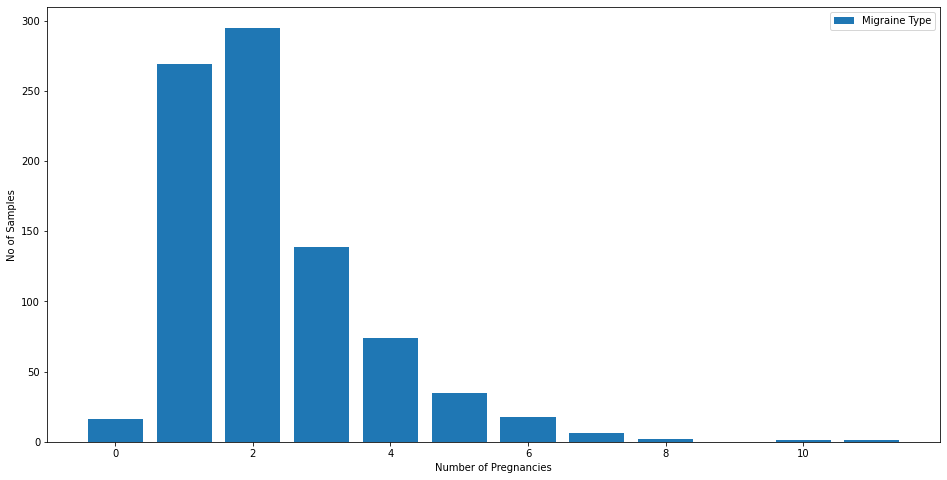

In [9]:
# d=df1['Num of pregnancies'].value_counts()
# d1=df1['STDs: Number of diagnosis'].value_counts()
# x=d1.values
# y=d.values

d=df1['Num of pregnancies'].value_counts()
x=d.index.values
y=d.values

plt.figure(figsize=(16,8))
plt.bar(x,y,label='Migraine Type')
plt.xlabel('Number of Pregnancies')
plt.ylabel('No of Samples')
plt.legend()
plt.show()

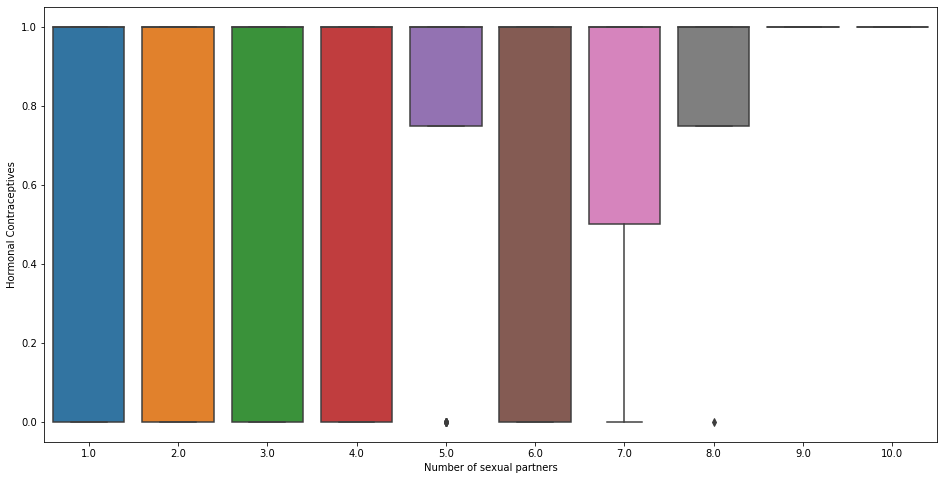

In [10]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df1['Number of sexual partners'], y= df1['Hormonal Contraceptives'], data=df1)

In [11]:
df1.isnull().values.any().any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


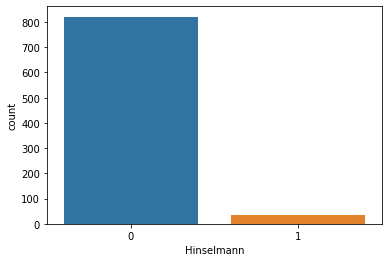

In [12]:
sns.countplot(df1['Hinselmann'])


In [13]:
df1.shape

(856, 25)

In [14]:
X=df1.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis=1)
Y1=df1['Hinselmann']

In [15]:
col_names = pd.concat([X, Y1], axis=1).columns.tolist()
# transform the dataset
oversample = BorderlineSMOTE()
X, Y1 = oversample.fit_resample(X, Y1)
print(type(X))

df_= pd.concat([X, Y1], axis=1)
# smote_array = np.concatenate([X, Y1.reshape(-1, 1)], axis=1)
# df_ = pd.DataFrame(smote_array,columns=col_names)
# # clf = ExtraTreesClassifier(n_estimators=50)
# clf = clf.fit(X, Y1)

# features = ['Age', 'Number of sexual partners', 'First sexual intercourse',
#     'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
#     'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
#     'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
#     'STDs:syphilis', 'STDs:HIV', 'STDs: Number of diagnosis', 'Dx:Cancer',
#     'Dx:CIN', 'Dx:HPV', 'Dx']

# feat_importances = pd.Series(clf.feature_importances_, index=features)

# print(feat_importances.sort_values())

<class 'pandas.core.frame.DataFrame'>


In [16]:
df_.shape

(1642, 22)

In [17]:
df_.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs (number),STDs:condylomatosis,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann
0,18,4.0,15.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.00,37.0,1.0,3.0,0.0,...,0,0.0,0.0,0.0,0,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.00,0.0,1.0,15.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.00,3.4,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0,0,0,0,0,1
7,26,1.0,26.0,3.0,0.0,0.00,0.0,1.0,2.0,1.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,1,0,1,1,0
9,44,3.0,15.0,2.0,1.0,1.27,2.8,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0


In [18]:
X.shape

(1642, 21)

In [19]:
Y1.shape

(1642,)

In [20]:
df_= df_.sample(frac=1,random_state=1).reset_index()

In [21]:
df_.head(10)

,index,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs (number),STDs:condylomatosis,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann
0,161,28,2.000000,18.000000,2.000000,0.000000,0.000000,0.000000,1.000000,6.000000,...,0,0.0,0.0,0.0,0,0,0,0,0,0
1,1016,21,1.469920,18.234960,1.234960,0.000000,0.000000,0.000000,1.000000,11.885362,...,0,0.0,0.0,0.0,0,0,0,0,0,1
2,1498,33,3.000000,19.699989,4.049983,0.349994,2.449961,0.559991,1.000000,0.191500,...,0,0.0,0.0,0.0,0,0,0,0,0,1
3,558,38,1.000000,24.000000,3.000000,0.000000,0.000000,0.000000,1.000000,6.500000,...,0,0.0,0.0,0.0,0,0,0,0,0,0
4,799,35,3.000000,17.000000,3.000000,1.000000,20.000000,2.000000,1.000000,2.000000,...,0,0.0,0.0,0.0,0,0,0,0,0,0
5,1566,30,2.502715,17.251357,2.502715,0.000000,0.000000,0.000000,1.000000,10.759501,...,0,0.0,0.0,0.0,0,0,0,0,0,1
6,1066,17,1.446591,16.106817,1.446591,0.446591,0.223296,0.022330,0.446591,0.147375,...,0,0.0,0.0,0.0,0,0,0,0,0,1
7,1080,33,2.860227,20.580680,6.000000,0.860227,6.021586,1.376363,1.000000,0.354830,...,0,0.0,0.0,0.0,0,0,0,0,0,1
8,592,20,3.000000,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0,0.0,0.0,0.0,0,0,0,0,0,0
9,1013,19,2.038821,15.000000,2.922358,0.000000,0.000000,0.000000,1.000000,0.596305,...,0,0.0,0.0,0.0,0,0,0,0,0,1


In [22]:
X=df_.drop(['Hinselmann'],axis=1)
Y1=df_['Hinselmann']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y1_train, Y1_test = train_test_split(X, 
                                                  Y1, 
                                                  test_size=0.2, 
                                                  random_state=123)

In [25]:
print(f"Shape of Y1_train is {Y1_train.shape}")
print(f"Shape of X_train is {X_train.shape}")

Shape of Y1_train is (1313,)
Shape of X_train is (1313, 22)


In [53]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# tf.random.set_seed(123)
neuralNetworkModel = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')])

neuralNetworkModel.compile(optimizer=opt,
                           loss='binary_crossentropy',
                          metrics=['accuracy',tf.keras.metrics.Precision(name='precision')])
trainingResults = neuralNetworkModel.fit(X_train,Y1_train,validation_data=(X_test,Y1_test),batch_size=30,epochs=50,shuffle=True)

Epoch 1/50
44/44 [==============================] - 2s 19ms/step - loss: 1.6206 - accuracy: 0.5301 - precision: 0.5216 - val_loss: 0.5847 - val_accuracy: 0.5289 - val_precision: 0.5142
Epoch 2/50
44/44 [==============================] - 0s 5ms/step - loss: 0.6299 - accuracy: 0.6306 - precision: 0.5929 - val_loss: 0.5032 - val_accuracy: 0.6778 - val_precision: 0.6124
Epoch 3/50
44/44 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.7479 - precision: 0.6931 - val_loss: 0.3807 - val_accuracy: 0.8571 - val_precision: 0.8128
Epoch 4/50
44/44 [==============================] - 0s 6ms/step - loss: 0.4129 - accuracy: 0.7883 - precision: 0.7396 - val_loss: 0.3530 - val_accuracy: 0.8419 - val_precision: 0.7857
Epoch 5/50
44/44 [==============================] - 0s 5ms/step - loss: 0.3272 - accuracy: 0.8515 - precision: 0.8122 - val_loss: 0.3848 - val_accuracy: 0.8815 - val_precision: 0.9699
Epoch 6/50
44/44 [==============================] - 0s 5ms/step - loss: 0.3191 

In [54]:
neuralNetworkModel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 512)               11776     
                                                                 
 dense_54 (Dense)            (None, 256)               131328    
                                                                 
 dense_55 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_56 (Dense)            (None, 64)                8256      
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)               

In [55]:
trainingAccuracy = neuralNetworkModel.evaluate(X_train,Y1_train,verbose=0)
testingAccuracy = neuralNetworkModel.evaluate(X_test,Y1_test,verbose=0)
print('\n\n')
print('\nTraining Accuracy: ',trainingAccuracy[1])
print('\nTest Accuracy: ',testingAccuracy[1])





Training Accuracy:  0.9482101798057556

Test Accuracy:  0.9513677954673767


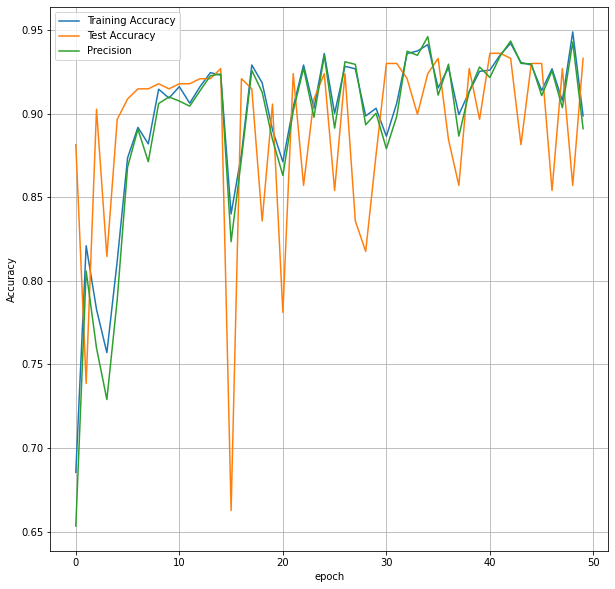

In [30]:
plt.figure(figsize=(10,10))
plt.plot(trainingResults.history['accuracy'], label='Training Accuracy')
plt.plot(trainingResults.history['val_accuracy'], label='Test Accuracy')
plt.plot(trainingResults.history['precision'], label='Precision')
# plt.plot(trainingResults.history['loss'], label='Loss')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [32]:
from sklearn.metrics import roc_curve
y_pred_keras = neuralNetworkModel.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y1_test, y_pred_keras)

In [34]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

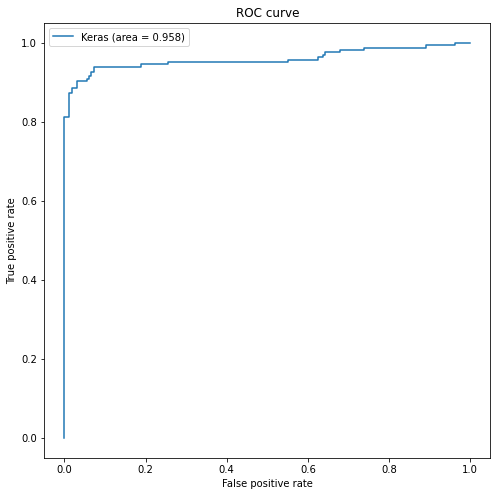

In [36]:
plt.figure(figsize=(8,8))
plt.plot(fpr_keras, tpr_keras,label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()